# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
# importing files and adding names to columns
cnames=['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings']
df=pd.read_csv("E:/Data Trained/Project 3/abalone.csv",names=cnames)
df.head(10)

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
# mathematical description 
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
# seeing no. of rows and cloumns
df.shape

(4177, 9)

# EDA

In [40]:
#dropping rings after updating it to age column
df['Age']=df['Rings'].add(1.5)
df=df.drop('Rings',axis=1)
df.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5


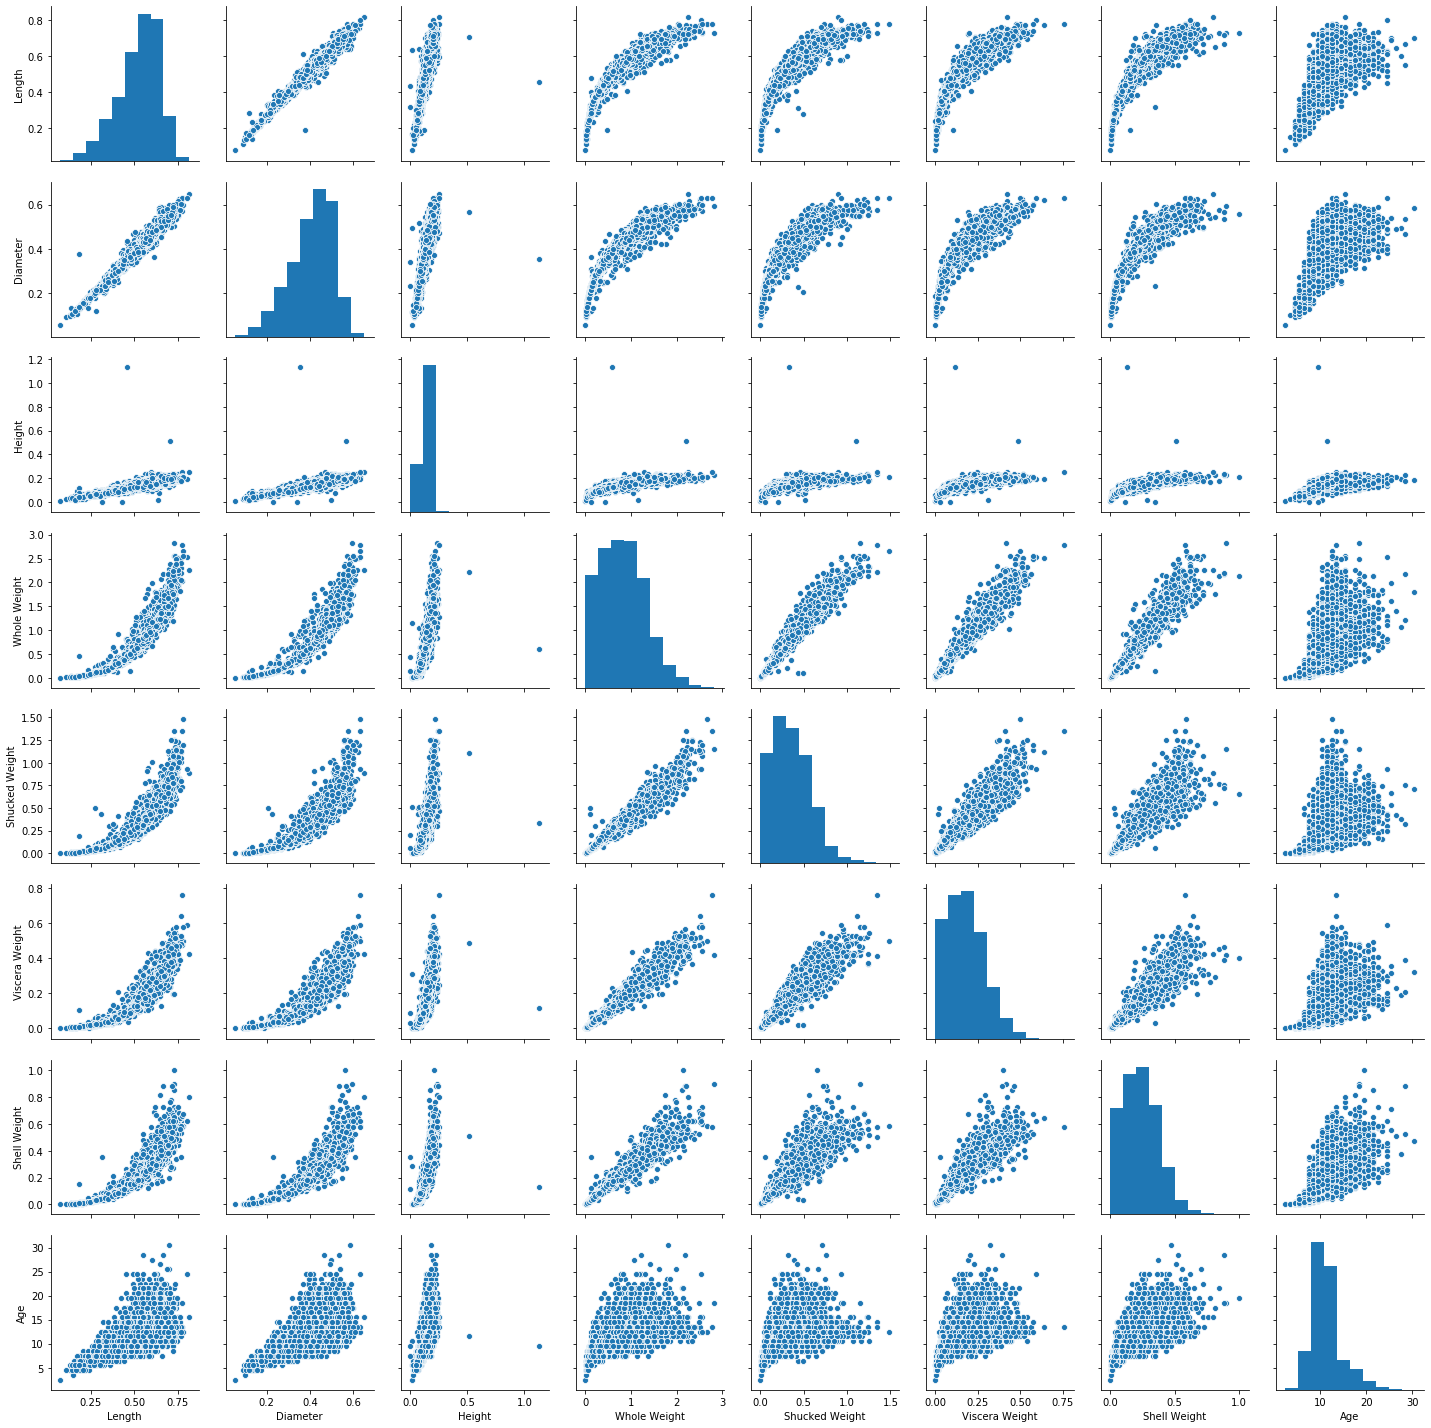

In [16]:
sns.pairplot(df)

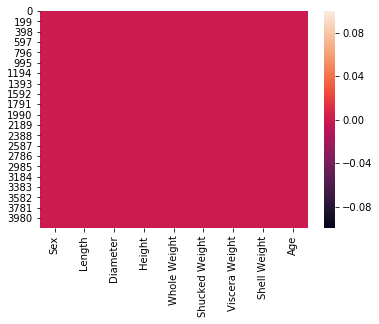

In [14]:
sns.heatmap(df.isnull())

In [17]:
numerical=df.corr()

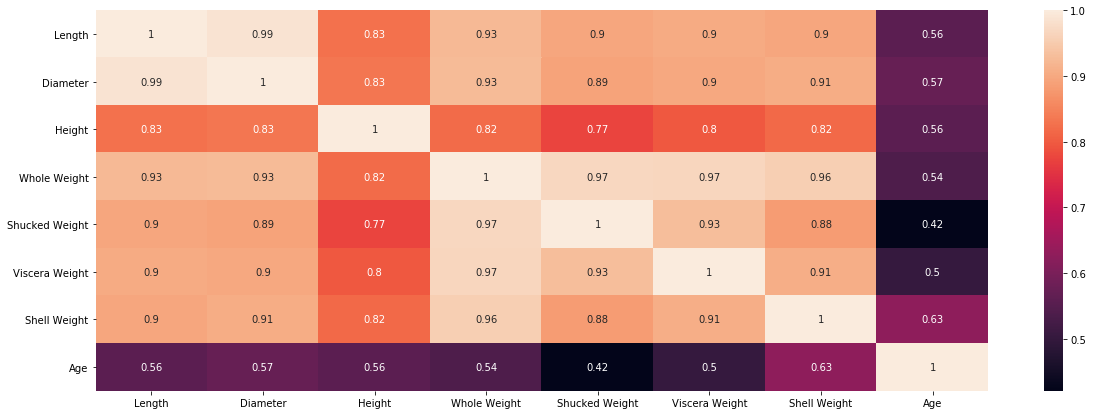

In [12]:
plt.figure(figsize = (20,7))
sns.heatmap(numerical,annot = True)

->Whole Weight is almost linearly varying with all other features except age
->Height has least linearity with remaining features
->Age is most linearly proportional with Shell Weight followed by Diameter,length and height
->Age is least correlated with Shucked Weight

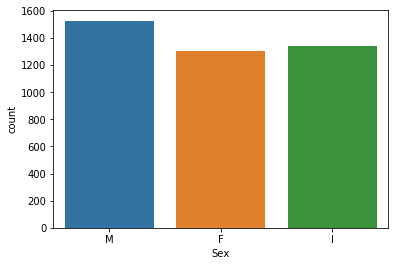

In [25]:
ax=sns.countplot(x="Sex", data=df)

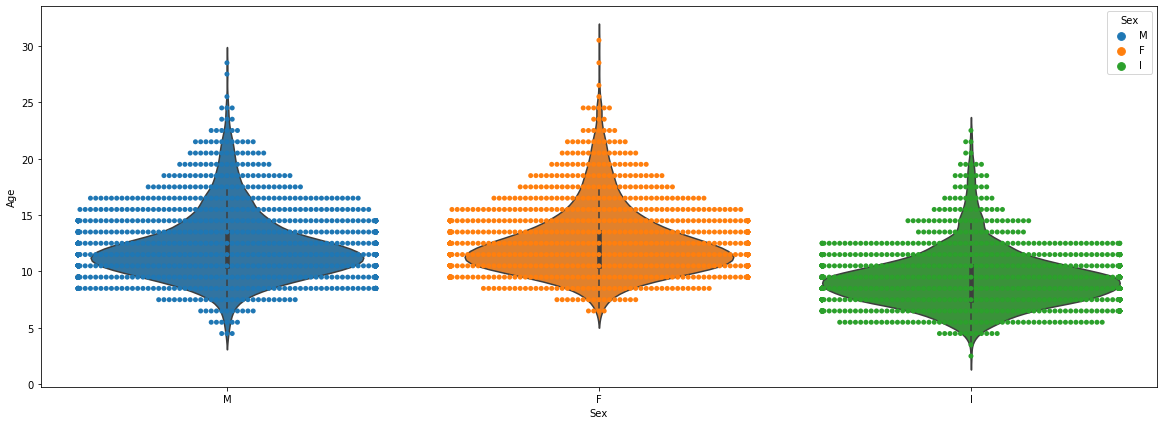

In [31]:
plt.figure(figsize = (20,7))
sns.violinplot(x='Sex',y='Age',data=df)
sns.swarmplot(x='Sex',y='Age',data=df,hue='Sex')

# age data looks like:
Male : age majority lies in between 7.5 years to 19 years

Female: age majority lies in between 8 years to 19 years

Immature: age majority lies in between 6 years to less than 10 years

In [38]:
# outlier detection
df=pd.get_dummies(df)
dummy_df=df

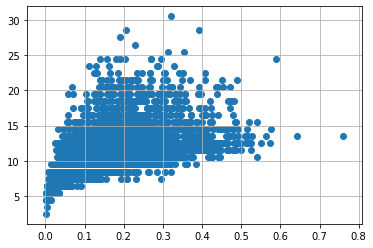

In [43]:
plt.scatter(x=df['Viscera Weight'],y=df['Age'])
plt.grid(True)

In [51]:
df.drop(df[(df['Viscera Weight']>0.5)&(df['Age']<20)].index, inplace=True)
df.drop(df[(df['Viscera Weight']<0.5)&(df['Age']>25)].index,inplace=True)

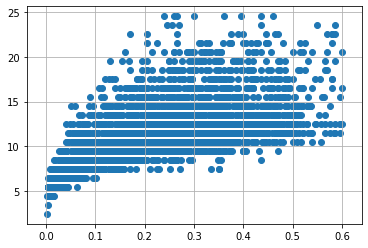

In [53]:
plt.scatter(x=df['Shell Weight'],y=df['Age'])
plt.grid(True)

In [55]:
df.drop(df[(df['Shell Weight']>0.6)&(df['Age']<25)].index,inplace=True)
df.drop(df[(df['Shell Weight']<0.6)&(df['Age']>25)].index,inplace=True)

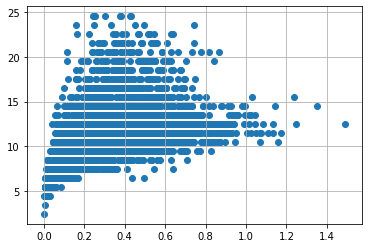

In [57]:
plt.scatter(x=df['Shucked Weight'],y=df['Age'])
plt.grid(True)

In [59]:
df.drop(df[(df['Shucked Weight']>=1)&(df['Age']<20)].index,inplace = True)
df.drop(df[(df['Shucked Weight']<1)&(df['Age']>20)].index,inplace = True)

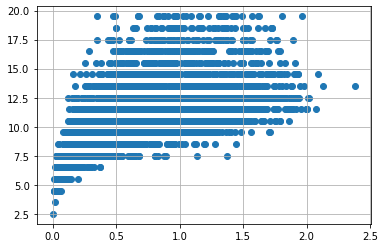

In [60]:
plt.scatter(x=df['Whole Weight'],y=df['Age'])
plt.grid(True)

In [63]:
df.drop(df[(df['Whole Weight']>=2.5)&(df['Age'] < 25)].index,inplace=True)
df.drop(df[(df['Whole Weight']<2.5)&(df['Age'] > 25)].index,inplace=True)

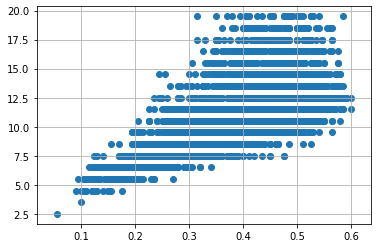

In [64]:
plt.scatter(x=df['Diameter'],y=df['Age'])
plt.grid(True)

In [65]:
df.drop(df[(df['Diameter']<0.1)&(df['Age'] < 5)].index,inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['Age']>25)].index,inplace=True)
df.drop(df[(df['Diameter']>=0.6)&(df['Age']<25)].index,inplace=True)

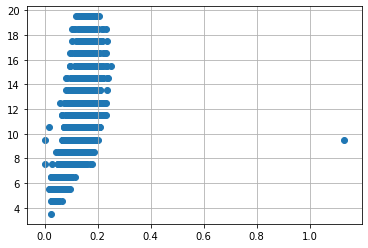

In [67]:
plt.scatter(x = df['Height'], y = df['Age'])
plt.grid(True)

In [69]:
df.drop(df[(df['Height']>0.4)&(df['Age']<15)].index,inplace=True)
df.drop(df[(df['Height']<0.4)&(df['Age']>25)].index,inplace=True)

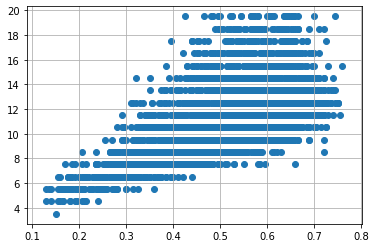

In [70]:
plt.scatter(x=df['Length'],y= df['Age'])
plt.grid(True)

In [72]:
df.drop(df[(df['Length'] <0.1)&(df['Age']<5)].index,inplace=True)
df.drop(df[(df['Length']<0.8)&(df['Age']>25)].index,inplace=True)
df.drop(df[(df['Length']>=0.8)&(df['Age']<25)].index,inplace =True)

In [75]:
#splitting the data to create a validation set

X= df.drop('Age',axis = 1)
y=df['Age']

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [82]:
standardScale = StandardScaler()
standardScale.fit_transform(X)
selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

# Model (Linear Regression)

In [84]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
m = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set:%2f'%s)
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set:%2f'%p)

Mean Squared error of training set:3.575116
Mean Squared error of testing set:3.516749


In [93]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)
p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.53
R2 Score of testing set:0.54


# Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
 regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

In [97]:
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [98]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
regr.score(X_train, y_train)

0.42412460219440035

In [102]:
regr.score(X_test, y_test)

0.44188138346893935

# Kneighbour regression

In [106]:
from sklearn.neighbors import KNeighborsRegressor

In [112]:
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [108]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
knn.score(X_train, y_train)

0.45218491204223926

In [109]:
knn.score(X_test, y_test)

0.7026341531162161